In [42]:
#!/usr/bin/env python
from __future__ import division

import csv
import json
import sys
import os
import numpy as np
import pandas as pd
import datetime
import uuid
import random

from datetime import datetime
from datetime import timedelta

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Experiment parameters
EXP_DATE = '04052017'
MA_TYPE = 'SMA'
COMPONENT = 'Chloride'
# METHOD = 'RS2'
QC_RULES = ['13s','22s']

URefL = 106
LRefL = 99
UTL = 104
LTL =99
WINDOW = 50 


In [62]:
%run -n result.py moving_average_processing.py

In [58]:
WORK_DIR = 'C:\\Users\\thoma\\Box Sync\\01_Research\\01_Projects\\moving_average\\'
DATA_DIR = WORK_DIR + 'data\\'
OUT_DIR = WORK_DIR + 'out\\'

SODIUM_CSV_PATH = DATA_DIR + 'sodium_12302016_01272017.csv'
POTASSIUM_CSV_PATH = DATA_DIR + 'potassium_12302016_01272017.csv'
CLORIDE_CSV_PATH = DATA_DIR + 'chloride_rs1_rs2_123016_012917.csv'
C02_CSV_PATH = DATA_DIR + 'bicarb_12302016_01272017.csv'
BUN_CSV_PATH = DATA_DIR + 'bun_12302016_01272017.csv'
CR_CSV_PATH = DATA_DIR + 'creatinine_12302016_01272017.csv'
GLUCOSE_CSV_PATH = DATA_DIR + 'glucose_12302016_01272017.csv'

In [26]:
CWD = 'C:\\Users\\thoma\\Documents\\00GitHub\\nifi_SMA_conf\\jupyter_notebooks\\'
MSH_PATH = CWD + 'msh.txt'
OBR_PATH = CWD + 'obr.txt'
OBX_PATH = CWD + 'obx.txt'

In [27]:
msh_seg = open(MSH_PATH, 'r').read()
obr_seg = open(OBR_PATH, 'r').read()
obx_seg = open(OBX_PATH, 'r').read()

In [75]:
lab()

{'bicarb': 20,
 'bun': 220,
 'chloride': 70,
 'creatinine': 14,
 'glucose': 131,
 'potassium': 3,
 'sodium': 121}

In [12]:
msh_seg.replace('***date_time_message***', str(datetime.datetime.now()))

'MSH|^~\\&|||||2017-04-20 14:56:03.093000||ORU^R01|||||||'

In [25]:
msh_seg + obr_seg + obx_seg + obx_seg + obx_seg

'MSH|^~\\&|||||***date_time_message***||ORU^R01|||||||OBR|***set_id***|***spec_id***||***universal_service_id***||***req_time***|***obs_time***|***obs_end_time***||||||||||***method***|||||||***result_status***||||OBX|***set_id***||***obs_id***|****obs_sub_id***|***obs_result***|***obs_result_units***|****obs_sub_id***|||||||***obx_obs_time***|||39|***method***|OBX|***set_id***||***obs_id***|****obs_sub_id***|***obs_result***|***obs_result_units***|****obs_sub_id***|||||||***obx_obs_time***|||39|***method***|OBX|***set_id***||***obs_id***|****obs_sub_id***|***obs_result***|***obs_result_units***|****obs_sub_id***|||||||***obx_obs_time***|||39|***method***|'

# Sodium

Size of Sodium series: 29431
2016-12-30 00:34:00 - 2017-01-28 00:36:00

Sodium Descriptors:count    29422.000000
mean       139.594283
std          4.475274
min        111.000000
25%        137.000000
50%        140.000000
75%        142.000000
max        180.000000
Name: Value, dtype: float64
Sodium Median:140.0
Sodium CV:-0.0906574317124
Sodium Skew: 0.712141929442
Sodium Kurtosis: 7.74076596419

Size of Normal Sodium series: 28027
2016-12-30 00:34:00 - 2017-01-28 00:36:00
Normal Sodium Descriptors:count    28027.000000
mean       139.544332
std          3.363595
min        131.000000
25%        137.000000
50%        140.000000
75%        142.000000
max        148.000000
Name: Value, dtype: float64
Normal Sodium Median:140.0
Normal Sodium CV:-0.135470474939
Normal Sodium Skew: -0.17020221963
Normal Sodium Kurtosis: -0.108894748596


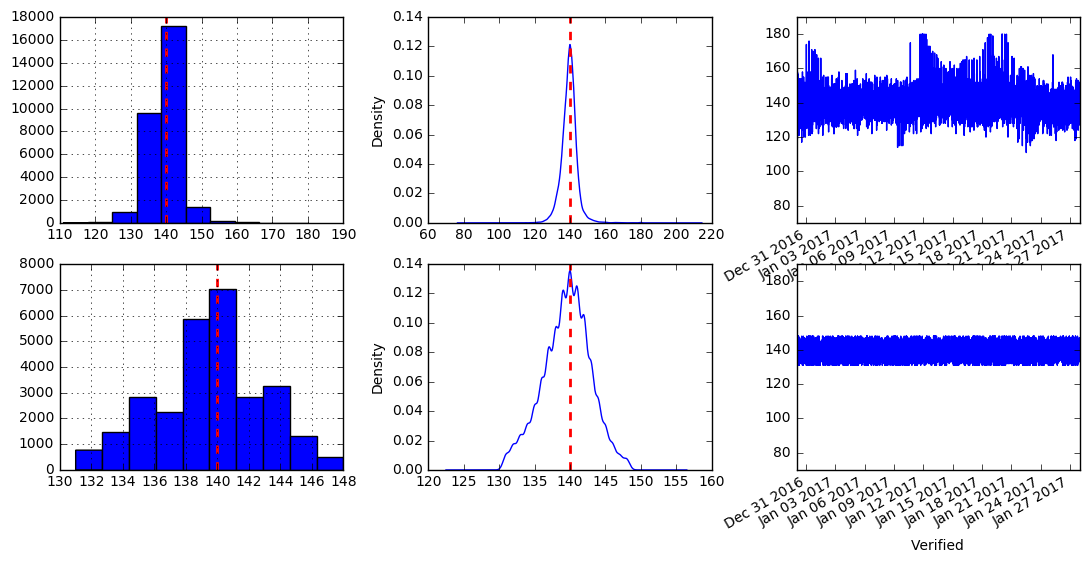

In [59]:
UTL = 148.54
LTL = 130.64

parse_dates = ['Verified']
df = pd.read_csv(SODIUM_CSV_PATH, parse_dates=parse_dates)

df = df.sort_values(by='Verified')
df_ = df.loc[(df.Test != 'QC YH CHEM PANEL 1')]
df_ = df_[['Verified','Value']]
df_.to_csv('tmp.csv', index=False)

val_series = pd.Series.from_csv('tmp.csv',header=0)
norm_val_series = val_series[(val_series <= UTL) & (val_series >= LTL)]

print "Size of Sodium series: {}".format(len(val_series))
print "{} - {}\n".format(val_series.index[0],val_series.index[-1])
print ("Sodium Descriptors:{}".format(val_series.describe()))

print ("Sodium Median:{}".format(val_series.median()))
print ("Sodium CV:{}".format((val_series.mean() - val_series.median())/val_series.std()))

print ("Sodium Skew: {}".format(val_series.skew()))
print ("Sodium Kurtosis: {}".format(val_series.kurtosis()))

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(left=0.05, wspace=0.3)

ax1 = fig.add_subplot(331)
ax1 = val_series.hist()
ax1.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(332)
ax2 = val_series.plot(kind='kde')
ax2.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax3 = fig.add_subplot(333)
ax3 = val_series.plot(ylim=(70,190))

ax4 = fig.add_subplot(334)
ax4 = norm_val_series.hist()
ax4.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax5 = fig.add_subplot(335)
ax5 = norm_val_series.plot(kind='kde')
ax5.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax6 = fig.add_subplot(336)
ax6 = norm_val_series.plot(ylim=(70,190))

print "\nSize of Normal Sodium series: {}".format(len(norm_val_series))
print "{} - {}".format(norm_val_series.index[0],norm_val_series.index[-1])
print ("Normal Sodium Descriptors:{}".format(norm_val_series.describe()))

print ("Normal Sodium Median:{}".format(norm_val_series.median()))
print ("Normal Sodium CV:{}".format((norm_val_series.mean() - norm_val_series.median())/norm_val_series.std()))

print ("Normal Sodium Skew: {}".format(norm_val_series.skew()))
print ("Normal Sodium Kurtosis: {}".format(norm_val_series.kurtosis()))

# Potassium


Size of Potassium series: 29174

2016-12-30 00:34:00 - 2017-01-28 00:36:00

Potassium Descriptors:
count    28564.000000
mean         4.199993
std          0.578461
min          1.900000
25%          3.800000
50%          4.200000
75%          4.500000
max          8.900000
Name: Value, dtype: float64

Potassium Median:4.2

Potassium CV:-1.2104215256e-05

Potassium Skew: 0.680757033975

Potassium Kurtosis: 2.40588625314


Size of Normal Potassium series: 27099

2016-12-30 00:34:00 - 2017-01-28 00:26:00

Normal Potassium Descriptors:
count    27099.000000
mean         4.165633
std          0.465209
min          3.100000
25%          3.800000
50%          4.200000
75%          4.500000
max          5.300000
Name: Value, dtype: float64

Normal Potassium Median:4.2

Normal Potassium CV:-0.0738734800505

Normal Potassium Skew: 0.116127882231

Normal Potassium Kurtosis: -0.311566990553



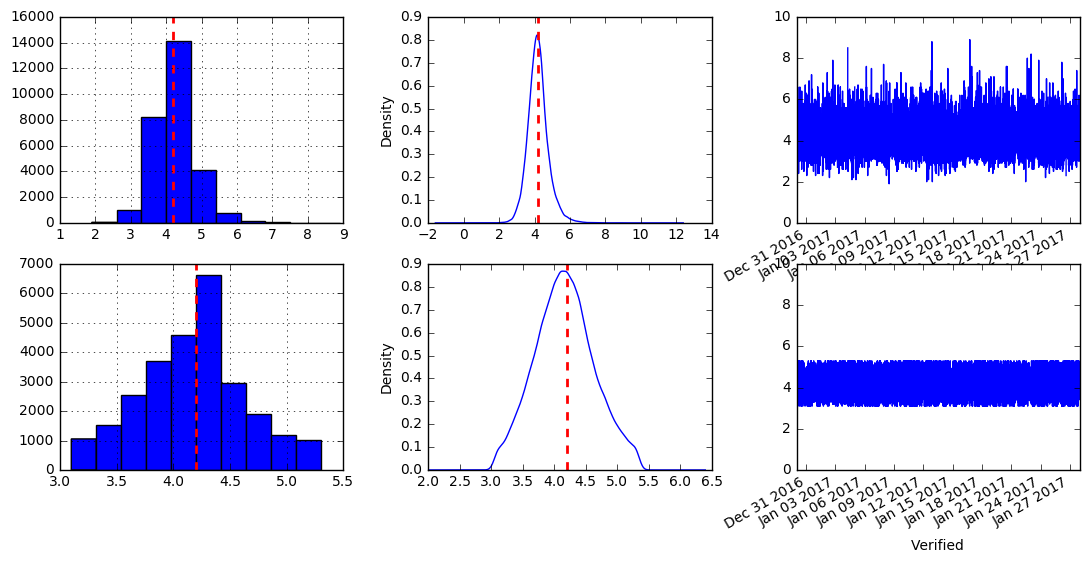

In [82]:
UTL = 5.356915
LTL = 3.043071

parse_dates = ['Verified']
df = pd.read_csv(POTASSIUM_CSV_PATH, parse_dates=parse_dates)

df = df.sort_values(by='Verified')
df_ = df.loc[(df.Test != 'QC YH CHEM PANEL 1')]
df_ = df_[['Verified','Value']]
df_.to_csv('tmp.csv', index=False)

val_series = pd.Series.from_csv('tmp.csv',header=0)
norm_val_series = val_series[(val_series <= UTL) & (val_series >= LTL)]

print "\nSize of Potassium series: {}\n".format(len(val_series))
print "{} - {}\n".format(val_series.index[0],val_series.index[-1])
print ("Potassium Descriptors:\n{}\n".format(val_series.describe()))

print ("Potassium Median:{}\n".format(val_series.median()))
print ("Potassium CV:{}\n".format((val_series.mean() - val_series.median())/val_series.std()))

print "Potassium Skew: {}\n".format(val_series.skew())
print "Potassium Kurtosis: {}\n".format(val_series.kurtosis())


fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(left=0.05, wspace=0.3)

ax1 = fig.add_subplot(331)
ax1 = val_series.hist()
ax1.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(332)
ax2 = val_series.plot(kind='kde')
ax2.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax3 = fig.add_subplot(333)
ax3 = val_series.plot(ylim=(0,10))

ax4 = fig.add_subplot(334)
ax4 = norm_val_series.hist()
ax4.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax5 = fig.add_subplot(335)
ax5 = norm_val_series.plot(kind='kde')
ax5.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax6 = fig.add_subplot(336)
ax6 = norm_val_series.plot(ylim=(0,10))


print "\nSize of Normal Potassium series: {}\n".format(len(norm_val_series))
print "{} - {}\n".format(norm_val_series.index[0],norm_val_series.index[-1])
print ("Normal Potassium Descriptors:\n{}\n".format(norm_val_series.describe()))

print ("Normal Potassium Median:{}\n".format(norm_val_series.median()))
print ("Normal Potassium CV:{}\n".format((norm_val_series.mean() - norm_val_series.median())/norm_val_series.std()))

print ("Normal Potassium Skew: {}\n".format(norm_val_series.skew()))
print ("Normal Potassium Kurtosis: {}\n".format(norm_val_series.kurtosis()))


# Chloride


Size of chloride series: 22878

2016-12-30 00:34:00 - 2017-01-29 16:02:00

Chloride Descriptors:
count    22873.00000
mean       101.04901
std          5.43728
min         53.00000
25%         98.00000
50%        101.00000
75%        104.00000
max        140.00000
Name: Value, dtype: float64

Chloride Median:101.0

Chloride CV:0.00901365237554

Chloride Skew: 0.15266669075

Chloride Kurtosis: 4.64782041691


Size of Normal Chloride series: 21586

2016-12-30 00:34:00 - 2017-01-29 16:02:00

Normal Chloride Descriptors:
count    21586.000000
mean       101.073381
std          4.095534
min         91.000000
25%         98.000000
50%        101.000000
75%        104.000000
max        111.000000
Name: Value, dtype: float64

Normal Chloride Median:101.0

Normal Chloride CV:0.0179172971859

Normal Chloride Skew: -0.122800424923

Normal Chloride Kurtosis: -0.22164111447



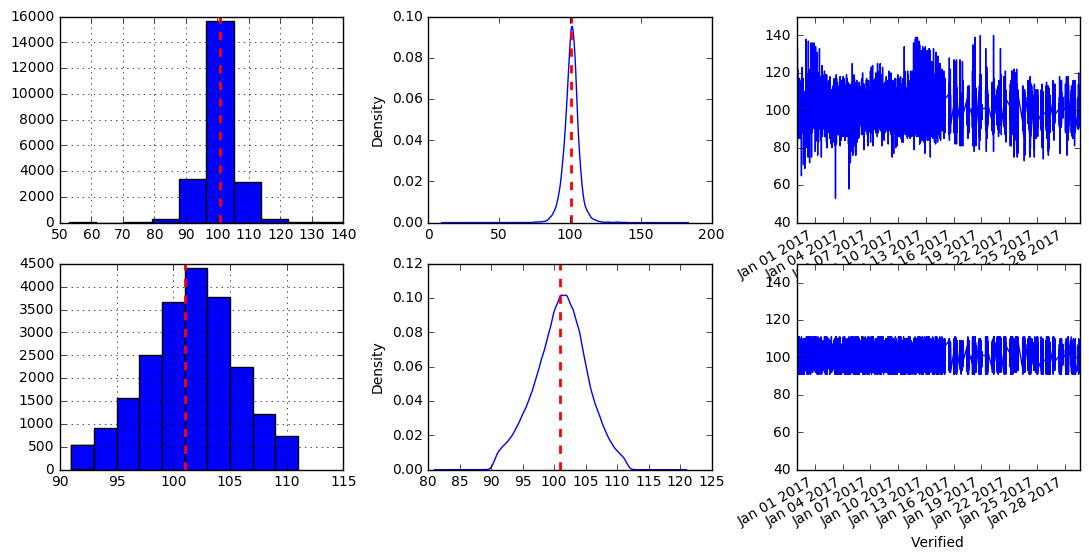

In [83]:
UTL = 111.92357
LTL = 90.17445

arse_dates = ['Verified']
df = pd.read_csv(CLORIDE_CSV_PATH, parse_dates=parse_dates)

df = df.sort_values(by='Verified')
df_ = df.loc[(df.Test != 'QC YH CHEM PANEL 1')]
df_ = df_[['Verified','Value']]
df_.to_csv('tmp.csv', index=False)

val_series = pd.Series.from_csv('tmp.csv',header=0)
norm_val_series = val_series[(val_series <= UTL) & (val_series >= LTL)]

print "\nSize of chloride series: {}\n".format(len(val_series))
print "{} - {}\n".format(val_series.index[0],val_series.index[-1])
print ("Chloride Descriptors:\n{}\n".format(val_series.describe()))

print ("Chloride Median:{}\n".format(val_series.median()))
print ("Chloride CV:{}\n".format((val_series.mean() - val_series.median())/val_series.std()))

print "Chloride Skew: {}\n".format(val_series.skew())
print "Chloride Kurtosis: {}\n".format(val_series.kurtosis())

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(left=0.05, wspace=0.3)

ax1 = fig.add_subplot(331)
ax1 = val_series.hist()
ax1.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(332)
ax2 = val_series.plot(kind='kde')
ax2.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax3 = fig.add_subplot(333)
ax3 = val_series.plot(ylim=(40,150))

ax4 = fig.add_subplot(334)
ax4 = norm_val_series.hist()
ax4.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax5 = fig.add_subplot(335)
ax5 = norm_val_series.plot(kind='kde')
ax5.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax6 = fig.add_subplot(336)
ax6 = norm_val_series.plot(ylim=(40,150))


print "\nSize of Normal Chloride series: {}\n".format(len(norm_val_series))
print "{} - {}\n".format(norm_val_series.index[0],norm_val_series.index[-1])
print ("Normal Chloride Descriptors:\n{}\n".format(norm_val_series.describe()))

print ("Normal Chloride Median:{}\n".format(norm_val_series.median()))
print ("Normal Chloride CV:{}\n".format((norm_val_series.mean() - norm_val_series.median())/norm_val_series.std()))

print ("Normal Chloride Skew: {}\n".format(norm_val_series.skew()))
print ("Normal Chloride Kurtosis: {}\n".format(norm_val_series.kurtosis()))

# Bicarb


Size of Bicarb series: 29034
2016-12-30 00:34:00 - 2017-01-28 00:36:00
Bicarb Descriptors:count    28896.000000
mean        22.657496
std          4.022876
min          6.000000
25%         20.000000
50%         23.000000
75%         25.000000
max         50.000000
Name: Value, dtype: float64
Bicarb Median:23.0
Bicarb CV:-0.0851391185089
Bicarb Skew: 0.556519487947
Bicarb Kurtosis: 3.40110770954

Size of Normal Bicarb series: 27735
2016-12-30 00:34:00 - 2017-01-28 00:36:00
Normal Bicarb Descriptors:count    27735.000000
mean        22.639445
std          3.235289
min         15.000000
25%         21.000000
50%         23.000000
75%         25.000000
max         32.000000
Name: Value, dtype: float64
Normal Bicarb Median:23.0
Normal Bicarb CV:-0.111444520734
Normal Bicarb Skew: 0.100808939094
Normal Bicarb Kurtosis: 0.0223250762637


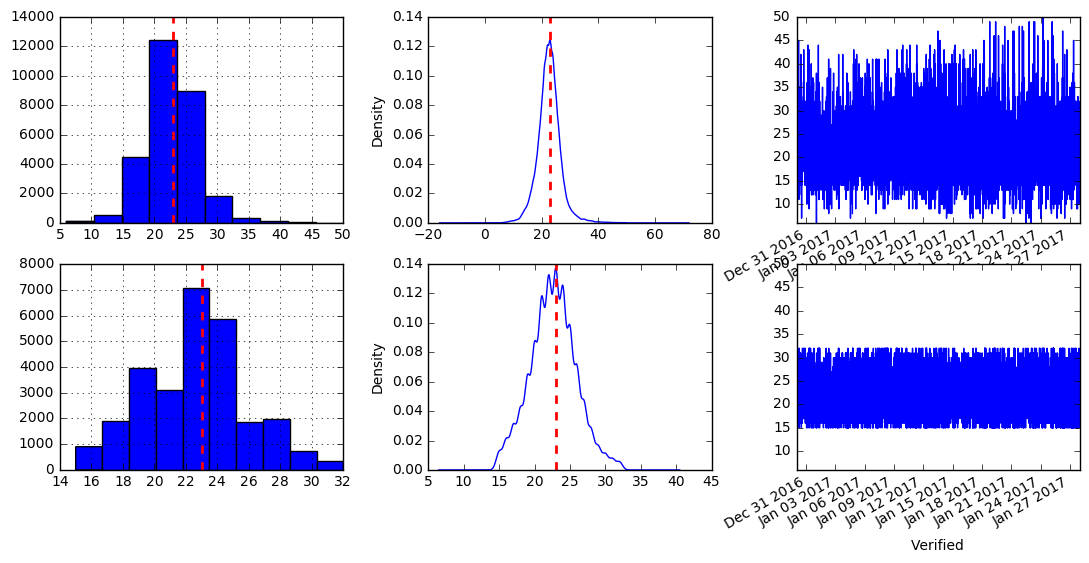

In [15]:
UTL = 32.173871
LTL = 14.568535

parse_dates = ['Verified']
df = pd.read_csv(C02_CSV_PATH, parse_dates=parse_dates)

df = df.sort_values(by='Verified')
df_ = df.loc[(df.Test != 'QC YH CHEM PANEL 1')]
df_ = df_[['Verified','Value']]
df_.to_csv('tmp.csv', index=False)

val_series = pd.Series.from_csv('tmp.csv',header=0)
norm_val_series = val_series[(val_series <= UTL) & (val_series >= LTL)]

print "\nSize of Bicarb series: {}".format(len(val_series))
print "{} - {}".format(val_series.index[0],val_series.index[-1])
print ("Bicarb Descriptors:{}".format(val_series.describe()))

print ("Bicarb Median:{}".format(val_series.median()))
print ("Bicarb CV:{}".format((val_series.mean() - val_series.median())/val_series.std()))

print "Bicarb Skew: {}".format(val_series.skew())
print "Bicarb Kurtosis: {}".format(val_series.kurtosis())

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(left=0.05, wspace=0.3)

ax1 = fig.add_subplot(331)
ax1 = val_series.hist()
ax1.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(332)
ax2 = val_series.plot(kind='kde')
ax2.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax3 = fig.add_subplot(333)
ax3 = val_series.plot(ylim=(6,50))

ax4 = fig.add_subplot(334)
ax4 = norm_val_series.hist()
ax4.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax5 = fig.add_subplot(335)
ax5 = norm_val_series.plot(kind='kde')
ax5.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax6 = fig.add_subplot(336)
ax6 = norm_val_series.plot(ylim=(6,50))


print "\nSize of Normal Bicarb series: {}".format(len(norm_val_series))
print "{} - {}".format(norm_val_series.index[0],norm_val_series.index[-1])
print ("Normal Bicarb Descriptors:{}".format(norm_val_series.describe()))

print ("Normal Bicarb Median:{}".format(norm_val_series.median()))
print ("Normal Bicarb CV:{}".format((norm_val_series.mean() - norm_val_series.median())/norm_val_series.std()))

print ("Normal Bicarb Skew: {}".format(norm_val_series.skew()))
print ("Normal Bicarb Kurtosis: {}".format(norm_val_series.kurtosis()))

# BUN


Size of BUN series: 29102
2016-12-30 00:34:00 - 2017-01-28 00:36:00
BUN Descriptors:count    29089.000000
mean        23.642717
std         19.783090
min          2.000000
25%         12.000000
50%         17.000000
75%         28.000000
max        221.000000
Name: Value, dtype: float64
BUN Median:17.0
BUN CV:0.335777529828
BUN Skew: 2.70629434376
BUN Kurtosis: 11.0013754016

Size of Normal BUN series: 27751
2016-12-30 00:35:00 - 2017-01-28 00:36:00
Normal BUN Descriptors:count    27751.000000
mean        20.459911
std         12.743263
min          2.000000
25%         12.000000
50%         17.000000
75%         26.000000
max         65.000000
Name: Value, dtype: float64
Normal BUN Median:17.0
Normal BUN CV:0.271509066124
Normal BUN Skew: 1.35209780233
Normal BUN Kurtosis: 1.50538051292


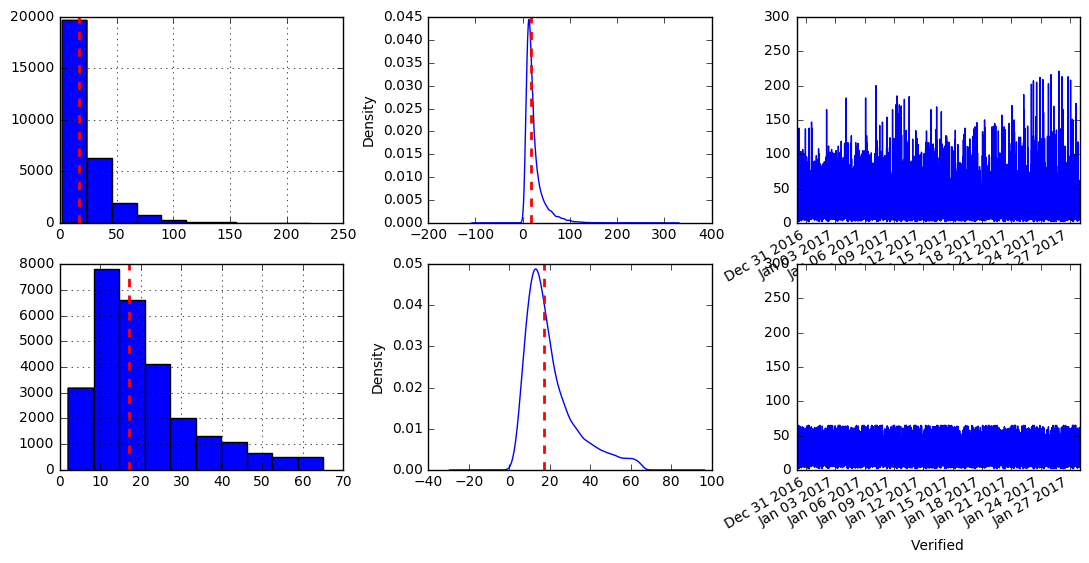

In [16]:
UTL = 65.077067
LTL = 0

parse_dates = ['Verified']
df = pd.read_csv(BUN_CSV_PATH, parse_dates=parse_dates)

df = df.sort_values(by='Verified')
df_ = df.loc[(df.Test != 'QC YH CHEM PANEL 1')]
df_ = df_[['Verified','Value']]
df_.to_csv('tmp.csv', index=False)

val_series = pd.Series.from_csv('tmp.csv',header=0)
norm_val_series = val_series[(val_series <= UTL) & (val_series >= LTL)]

print "\nSize of BUN series: {}".format(len(val_series))
print "{} - {}".format(val_series.index[0],val_series.index[-1])
print ("BUN Descriptors:{}".format(val_series.describe()))

print ("BUN Median:{}".format(val_series.median()))
print ("BUN CV:{}".format((val_series.mean() - val_series.median())/val_series.std()))

print "BUN Skew: {}".format(val_series.skew())
print "BUN Kurtosis: {}".format(val_series.kurtosis())

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(left=0.05, wspace=0.3)

ax1 = fig.add_subplot(331)
ax1 = val_series.hist()
ax1.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(332)
ax2 = val_series.plot(kind='kde')
ax2.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax3 = fig.add_subplot(333)
ax3 = val_series.plot(ylim=(0,300))

ax4 = fig.add_subplot(334)
ax4 = norm_val_series.hist()
ax4.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax5 = fig.add_subplot(335)
ax5 = norm_val_series.plot(kind='kde')
ax5.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax6 = fig.add_subplot(336)
ax6 = norm_val_series.plot(ylim=(0,300))


print "\nSize of Normal BUN series: {}".format(len(norm_val_series))
print "{} - {}".format(norm_val_series.index[0],norm_val_series.index[-1])
print ("Normal BUN Descriptors:{}".format(norm_val_series.describe()))

print ("Normal BUN Median:{}".format(norm_val_series.median()))
print ("Normal BUN CV:{}".format((norm_val_series.mean() - norm_val_series.median())/norm_val_series.std()))

print ("Normal BUN Skew: {}".format(norm_val_series.skew()))
print ("Normal BUN Kurtosis: {}".format(norm_val_series.kurtosis()))

# Creatinine


Size of Creatinine series: 29194
2016-12-30 00:34:00 - 2017-02-01 15:02:00
Creatinine Descriptors:count    29187.000000
mean         1.346140
std          1.556208
min          0.100000
25%          0.660000
50%          0.870000
75%          1.300000
max         20.420000
Name: Value, dtype: float64
Creatinine Median:0.87
Creatinine CV:0.305961903079
Creatinine Skew: 4.35054796466
Creatinine Kurtosis: 25.771570124

Size of Normal Creatinine series: 27543
2016-12-30 00:34:00 - 2017-02-01 15:02:00
Normal Creatinine Descriptors:count    27543.000000
mean         1.032988
std          0.638359
min          0.100000
25%          0.650000
50%          0.840000
75%          1.180000
max          4.000000
Name: Value, dtype: float64
Normal Creatinine Median:0.84
Normal Creatinine CV:0.302318395756
Normal Creatinine Skew: 2.08796337826
Normal Creatinine Kurtosis: 4.99945753918


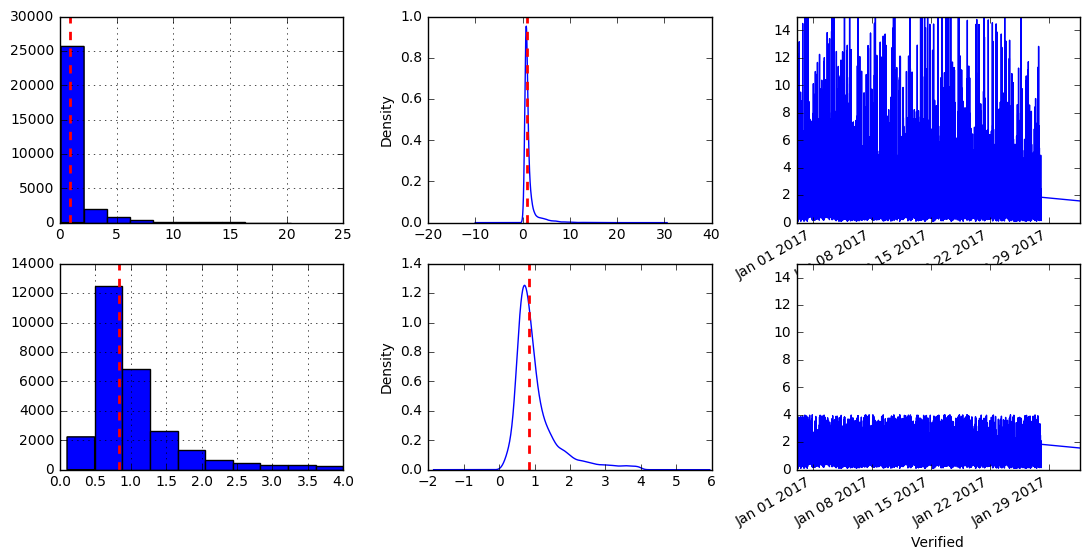

In [17]:
UTL = 4
LTL = 0

parse_dates = ['Verified']
df = pd.read_csv(CR_CSV_PATH, parse_dates=parse_dates)

df = df.sort_values(by='Verified')
df_ = df.loc[(df.Test != 'QC YH CHEM PANEL 1')]
df_ = df_[['Verified','Value']]
df_.to_csv('tmp.csv', index=False)

val_series = pd.Series.from_csv('tmp.csv',header=0)
norm_val_series = val_series[(val_series <= UTL) & (val_series >= LTL)]

print "\nSize of Creatinine series: {}".format(len(val_series))
print "{} - {}".format(val_series.index[0],val_series.index[-1])
print ("Creatinine Descriptors:{}".format(val_series.describe()))

print ("Creatinine Median:{}".format(val_series.median()))
print ("Creatinine CV:{}".format((val_series.mean() - val_series.median())/val_series.std()))

print "Creatinine Skew: {}".format(val_series.skew())
print "Creatinine Kurtosis: {}".format(val_series.kurtosis())

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(left=0.05, wspace=0.3)

ax1 = fig.add_subplot(331)
ax1 = val_series.hist()
ax1.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(332)
ax2 = val_series.plot(kind='kde')
ax2.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax3 = fig.add_subplot(333)
ax3 = val_series.plot(ylim=(0,15))

ax4 = fig.add_subplot(334)
ax4 = norm_val_series.hist()
ax4.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax5 = fig.add_subplot(335)
ax5 = norm_val_series.plot(kind='kde')
ax5.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax6 = fig.add_subplot(336)
ax6 = norm_val_series.plot(ylim=(0,15))


print "\nSize of Normal Creatinine series: {}".format(len(norm_val_series))
print "{} - {}".format(norm_val_series.index[0],norm_val_series.index[-1])
print ("Normal Creatinine Descriptors:{}".format(norm_val_series.describe()))

print ("Normal Creatinine Median:{}".format(norm_val_series.median()))
print ("Normal Creatinine CV:{}".format((norm_val_series.mean() - norm_val_series.median())/norm_val_series.std()))

print ("Normal Creatinine Skew: {}".format(norm_val_series.skew()))
print ("Normal Creatinine Kurtosis: {}".format(norm_val_series.kurtosis()))

# Glucose


Size of Glucose series: 29399
2016-12-30 00:34:00 - 2017-01-28 00:36:00
Glucose Descriptors:count    29382.000000
mean       129.265979
std         60.485592
min         10.000000
25%         95.000000
50%        111.000000
75%        143.000000
max       1317.000000
Name: Value, dtype: float64
Glucose Median:111.0
Glucose CV:0.301988928088
Glucose Skew: 3.4814942493
Glucose Kurtosis: 23.1203760897

Size of Normal Glucose series: 28355
2016-12-30 00:34:00 - 2017-01-28 00:36:00
Normal Glucose Descriptors:count    28355.000000
mean       121.086228
std         38.980824
min         10.000000
25%         94.000000
50%        110.000000
75%        138.000000
max        266.000000
Name: Value, dtype: float64
Normal Glucose Median:110.0
Normal Glucose CV:0.284402100573
Normal Glucose Skew: 1.28901498692
Normal Glucose Kurtosis: 1.53711306592


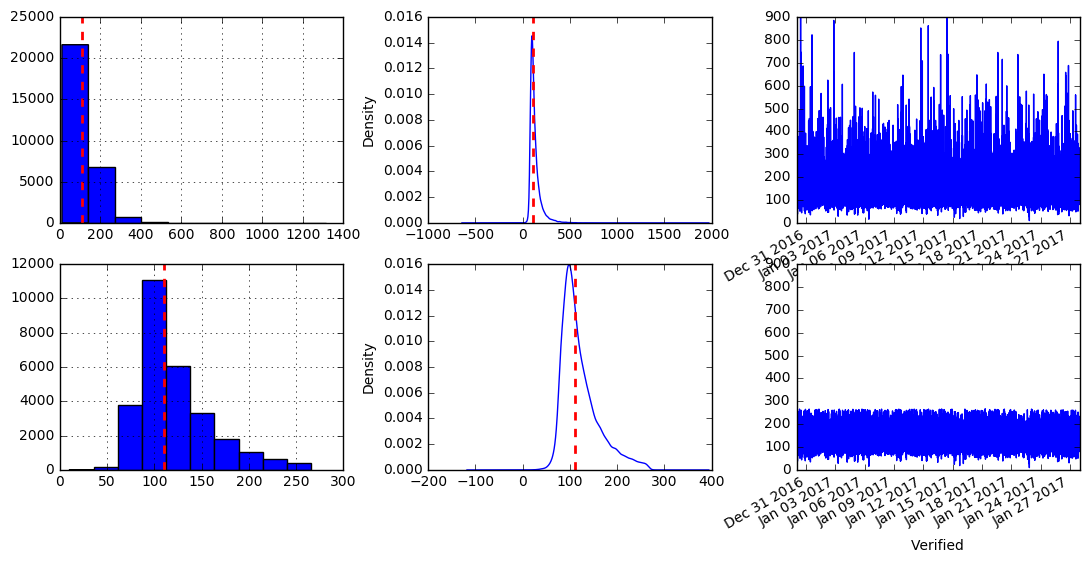

In [18]:
UTL = 266
LTL = 0

parse_dates = ['Verified']
df = pd.read_csv(GLUCOSE_CSV_PATH, parse_dates=parse_dates)

df = df.sort_values(by='Verified')
df_ = df.loc[(df.Test != 'QC YH CHEM PANEL 1')]
df_ = df_[['Verified','Value']]
df_.to_csv('tmp.csv', index=False)

val_series = pd.Series.from_csv('tmp.csv',header=0)
norm_val_series = val_series[(val_series <= UTL) & (val_series >= LTL)]

print "\nSize of Glucose series: {}".format(len(val_series))
print "{} - {}".format(val_series.index[0],val_series.index[-1])
print ("Glucose Descriptors:{}".format(val_series.describe()))


print ("Glucose Median:{}".format(val_series.median()))
print ("Glucose CV:{}".format((val_series.mean() - val_series.median())/val_series.std()))

print "Glucose Skew: {}".format(val_series.skew())
print "Glucose Kurtosis: {}".format(val_series.kurtosis())

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(left=0.05, wspace=0.3)

ax1 = fig.add_subplot(331)
ax1 = val_series.hist()
ax1.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(332)
ax2 = val_series.plot(kind='kde')
ax2.axvline(val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax3 = fig.add_subplot(333)
ax3 = val_series.plot(ylim=(0,900))

ax4 = fig.add_subplot(334)
ax4 = norm_val_series.hist()
ax4.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)

ax5 = fig.add_subplot(335)
ax5 = norm_val_series.plot(kind='kde')
ax5.axvline(norm_val_series.median(), color='r', linestyle='dashed', linewidth=2)
 
ax6 = fig.add_subplot(336)
ax6 = norm_val_series.plot(ylim=(0,900))


print "\nSize of Normal Glucose series: {}".format(len(norm_val_series))
print "{} - {}".format(norm_val_series.index[0],norm_val_series.index[-1])
print ("Normal Glucose Descriptors:{}".format(norm_val_series.describe()))

print ("Normal Glucose Median:{}".format(norm_val_series.median()))
print ("Normal Glucose CV:{}".format((norm_val_series.mean() - norm_val_series.median())/norm_val_series.std()))

print ("Normal Glucose Skew: {}".format(norm_val_series.skew()))
print ("Normal Glucose Kurtosis: {}".format(norm_val_series.kurtosis()))